# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [232]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [233]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df['flag_doente']

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: flag_doente, Length: 303, dtype: int64

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [234]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins = True).rename(columns = {0:'Saudáveis', 1:'Doentes', 'All':'Total'})
tab

flag_doente,Saudáveis,Doentes,Total
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [235]:
#Bivariada sex com número de saudáveis:
tab['Saudáveis']

sex
0.0     72
1.0     92
All    164
Name: Saudáveis, dtype: int64

In [236]:
#Bivariada sex com número de doentes:
tab['Doentes']

sex
0.0     25
1.0    114
All    139
Name: Doentes, dtype: int64

In [237]:
#Bivariada sex com números totais:
tab['Total']

sex
0.0     97
1.0    206
All    303
Name: Total, dtype: int64

In [238]:
#Quantidade média de doentes:
tab['Média doentes'] = tab['Doentes'][0] + tab['Doentes'][1] / 2
tab['Média doentes'] 

sex
0.0    82.0
1.0    82.0
All    82.0
Name: Média doentes, dtype: float64

In [239]:
#Chance de doença por sexo:
tab['Chance de doença'] = tab['Doentes']/tab['Saudáveis']
tab['Chance de doença']

sex
0.0    0.347222
1.0    1.239130
All    0.847561
Name: Chance de doença, dtype: float64

In [240]:
#Razão de chances  de doença (Odds Ratio):
tab['Razão de chances  de doença'] = tab['Doentes'][2] / tab['Saudáveis'][2]
tab['Razão de chances  de doença']

sex
0.0    0.847561
1.0    0.847561
All    0.847561
Name: Razão de chances  de doença, dtype: float64

In [241]:
#Logito (Log das chances de doença por sexo):
tab['Logito'] = np.log(tab['Chance de doença'])
tab['Logito']

sex
0.0   -1.057790
1.0    0.214410
All   -0.165392
Name: Logito, dtype: float64

In [242]:
#Log da razão de chances por sexo(WOE):
tab['WOE'] = np.log(tab['Razão de chances  de doença'][2:])
tab['WOE']

sex
0.0         NaN
1.0         NaN
All   -0.165392
Name: WOE, dtype: float64

In [243]:
#Exibindo tudo em um dataframe:
tab = tab.rename(columns = {0:'Saudáveis', 1:'Doentes', 'All':'Total'})
tab

flag_doente,Saudáveis,Doentes,Total,Média doentes,Chance de doença,Razão de chances de doença,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,82.0,0.347222,0.847561,-1.057790,NaN
1.0,92,114,206,82.0,1.239130,0.847561,0.214410,NaN
All,164,139,303,82.0,0.847561,0.847561,-0.165392,-0.165392


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [244]:
#Verificando valores mínimos e máximos para definir a categorização:
print(df['age'].min())
print(df['age'].max())

29.0
77.0


In [245]:
#Categorizando a variável 'age' por intervalos:
df['age_cat'] = pd.cut(df['age'], bins = [29, 39, 49, 59, 69, 79], labels = ['29 a 38 anos', '39 a 48 anos', '49 a 58 anos', '59 a 68 anos', '69 a 79 anos'])

In [246]:
#Cruzando a variável criada com a variável 'flag_doente':
tab2 = pd.crosstab(df['age_cat'], df['flag_doente'], margins = True).rename(columns = {0:'Saudáveis', 1:'Doentes', 'All':'Total'})
#Calculando a média de doentes:
tab2['Média de doentes'] = tab2['Doentes'][:5].mean()
#Calculando a chance de doença:
tab2['Chance de doença'] = tab2['Doentes']/tab2['Saudáveis']
#Calculando a razão de chances  de doença (Odds Ratio):
tab2['Razão de chances  de doença'] = tab2['Doentes'] / tab2['Saudáveis'][5]
#Calculando a chance de doença por grupos:
tab2['Logito'] = np.log(tab2['Chance de doença'])
#Calculando a razão de chances de doença por idade(WOE):
tab2['WOE'] = np.log(tab2['Razão de chances  de doença'])
tab2

flag_doente,Saudáveis,Doentes,Total,Média de doentes,Chance de doença,Razão de chances de doença,Logito,WOE
age_cat,,,,,,,,
29 a 38 anos,10,4,14,27.8,0.400000,0.024540,-0.916291,-3.707456
39 a 48 anos,50,22,72,27.8,0.440000,0.134969,-0.820981,-2.002708
49 a 58 anos,65,60,125,27.8,0.923077,0.368098,-0.080043,-0.999406
59 a 68 anos,32,49,81,27.8,1.531250,0.300613,0.426084,-1.201930
69 a 79 anos,6,4,10,27.8,0.666667,0.024540,-0.405465,-3.707456
All,163,139,302,27.8,0.852761,0.852761,-0.159276,-0.159276


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Axes: xlabel='flag_doente', ylabel='age_cat'>

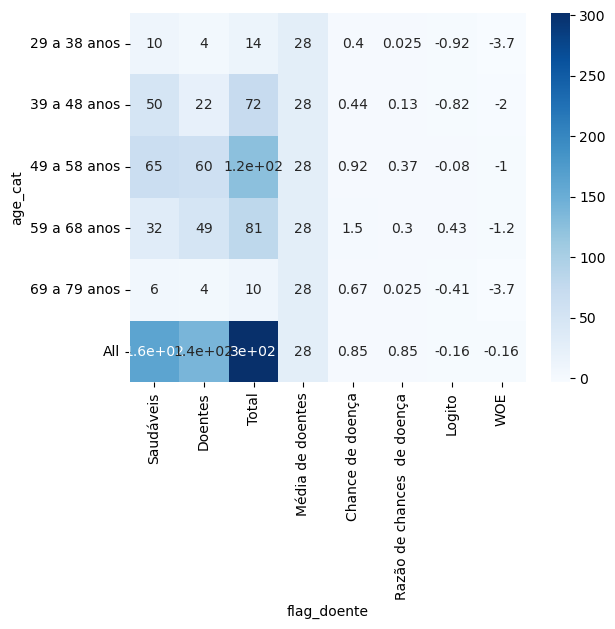

In [247]:
sns.heatmap(tab2, cmap='Blues', annot=True)